In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [5]:
path = "/Users/mattmacrides/Personal-Projects/Customer Segmentation 2 - Clustering/"
df = pd.read_csv(path + 'Customers.csv', sep=',', decimal='.')
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Let's look at a 3 variables to try to cluster: Age, Annual Income, and Spending Score.

In [6]:
X = df.iloc[:, [2, 3, 4]].values
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the features
X = scaler.fit_transform(X)

Fit the model from 1 to 11 clusters.

In [7]:
k_values = range(1, 11)
wcss = [] 
for k in k_values: 
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

Plotting the elbow curve

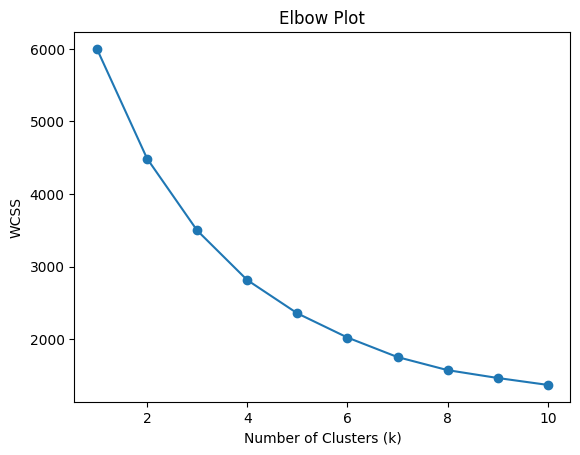

In [8]:
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

We see that the elbow is when cluster = 4. Let's fit the model here and predict y.

In [9]:
kmeans = KMeans(n_clusters = 4, n_init = 10, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's unscale the data to properly visualize.

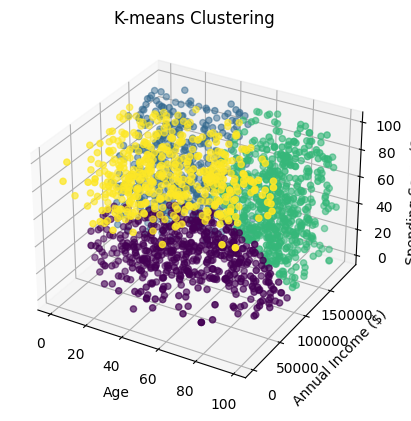

In [10]:
# Unscaled the scaled data
X = scaler.inverse_transform(X)

# Create a figure and an axis object for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($)')
ax.set_zlabel('Spending Score (1-100)')

# Set title for the plot
ax.set_title('K-means Clustering')

# Show the plot
plt.show()

Yellow:

Purple:

Blue:

Green:


In [95]:
df = pd.read_csv(path + 'Customers.csv', sep=',', decimal='.')
df.head(5)
X = df.iloc[:, [2, 3]].values
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to your data and transform the features
X = scaler.fit_transform(X)

In [96]:
k_values = range(1, 11)
wcss = [] 
for k in k_values: 
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

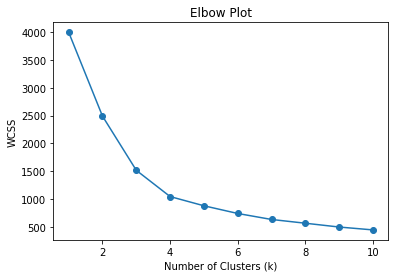

In [97]:
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [98]:
kmeans = KMeans(n_clusters = 4, n_init = 10, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

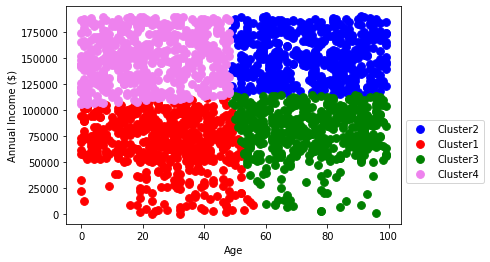

In [99]:
# Unscaled the scaled data
X = scaler.inverse_transform(X)
# Visualising the clusters
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1') 
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.xlabel('Age') 
plt.ylabel('Annual Income ($)') 
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()